## Importando Bibliotecas e Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style='white')
sns.color_palette('hls', 8)

# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

## Carregando dados

In [2]:
fraud_df = pd.read_csv('Fraud.csv')
fraud_df_orig = fraud_df.copy()

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- Colunas:

    step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

    type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

    amount -
    amount of the transaction in local currency.

    nameOrig - customer who started the transaction

    oldbalanceOrg - initial balance before the transaction

    newbalanceOrig - new balance after the transaction

    nameDest - customer who is the recipient of the transaction

    oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

    newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

    isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

    isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
# Fazendo o dataset ser balanceado e menor

frauds = fraud_df[fraud_df['isFraud'] == 1]
legits = fraud_df[fraud_df['isFraud'] == 0]
legits = legits.sample(n = len(frauds))
df_reduced = pd.concat([frauds, legits], axis = 0)

In [5]:
df_reduced.isFraud.value_counts(normalize = True)

0    0.5
1    0.5
Name: isFraud, dtype: float64

## EDA

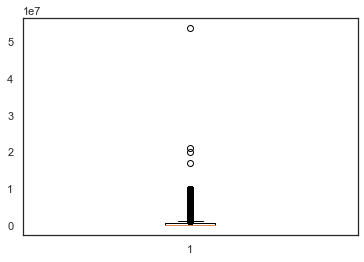

In [6]:
plt.boxplot(df_reduced.amount);

In [7]:
df_reduced.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,305.822659,8.246581e+05,1.242379e+06,5.248588e+05,8.240192e+05,1.253920e+06,0.500000,0.000974
std,193.305960,1.908085e+06,3.258644e+06,2.513400e+06,3.164520e+06,3.633951e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,162.000000,3.637421e+04,1.052325e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,283.000000,1.696141e+05,1.191438e+05,0.000000e+00,0.000000e+00,1.259121e+05,0.500000,0.000000
75%,408.000000,5.396587e+05,7.903324e+05,0.000000e+00,5.125247e+05,1.090888e+06,1.000000,0.000000
max,743.000000,5.385105e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


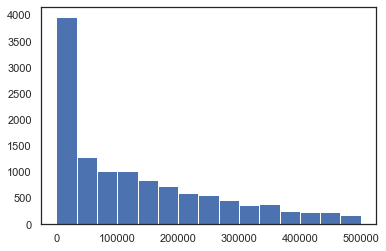

In [8]:
sample1 = df_reduced[df_reduced.amount < 5e5]

plt.hist(sample1.amount, bins = 15);

In [9]:
# from bokeh.plotting import figure, output_notebook, show, output_file
# from bokeh.models import ColumnDataSource

# p = figure(plot_width = 300, plot_height = 300, tools = "pan,reset,save")
# source = ColumnDataSource(data = dict(x = sample1.amount, y = sample1.index))

# p.circle(x='x', y = 'y', source=source, color = 'navy', alpha = 0.5)

# output_notebook()
# show(p)

## Data Cleaning

In [10]:
import datacleaner as dc

## Modelagem

In [11]:
#Imports de Modelagem (Normalização, Splits, Modelos, Validação)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import xgboost as xgb

In [12]:
#Definição de Features e Target

features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
numericals = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X = df_reduced[features]
y = df_reduced['isFraud']

In [13]:
#Splits e Normalização

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 4)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train[numericals])
X_test = scaler.transform(X_test[numericals])

## Testando Modelos com cross_val_score

In [14]:
# classificador_lgbm = lgb.LGBMClassifier(max_depth=3)

# 100 * cross_val_score(classificador_lgbm, X_train, y_train).mean()

In [15]:
log_reg = LogisticRegression('l2', solver='lbfgs')

100 * cross_val_score(log_reg, X_train, y_train).mean()

86.09320120279138

## Treinamento (Matriz Confusão)

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results_log_reg = log_reg.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)

confusion_matrix(y_test, log_reg_pred)

array([[2421,   43],
       [ 640, 1824]], dtype=int64)

In [17]:
log_reg_pred.shape

(4928,)

In [18]:
log_reg_metric_combo_dict = {}
threshold_list = [.3, .4, .5, .505, .51, .55, .7, .9]
pred_proba_df = pd.DataFrame(log_reg.predict_proba(X_test))


for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    test_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(test_accuracy))
    test_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(test_recall))
    test_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1), zero_division = 1)
    print('-> F1-Score: {}'.format(test_f1))
    
    log_reg_metric_combo = (test_accuracy + test_recall + test_f1)/3
    print(f'-> Métrica Combinada: {log_reg_metric_combo}')
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1)))
    
    log_reg_metric_combo_dict[i] = log_reg_metric_combo

log_reg_best_thresh = max(log_reg_metric_combo_dict, key=log_reg_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)
print('--------Melhor threshold log reg: ', log_reg_best_thresh)


******** For i = 0.3 ******
-> Acurácia: 0.8952922077922078
-> Recall: 0.9460227272727273
-> F1-Score: 0.9003476245654695
-> Métrica Combinada: 0.9138875198768015
[[2081  383]
 [ 133 2331]]

******** For i = 0.4 ******
-> Acurácia: 0.8950892857142857
-> Recall: 0.8242694805194806
-> F1-Score: 0.8870932518017034
-> Métrica Combinada: 0.8688173393451567
[[2380   84]
 [ 433 2031]]

******** For i = 0.5 ******
-> Acurácia: 0.8614042207792207
-> Recall: 0.7402597402597403
-> F1-Score: 0.8422996998383745
-> Métrica Combinada: 0.8146545536257785
[[2421   43]
 [ 640 1824]]

******** For i = 0.505 ******
-> Acurácia: 0.859375
-> Recall: 0.7353896103896104
-> F1-Score: 0.8394718554551772
-> Métrica Combinada: 0.8114121552815959
[[2423   41]
 [ 652 1812]]

******** For i = 0.51 ******
-> Acurácia: 0.8581574675324676
-> Recall: 0.7321428571428571
-> F1-Score: 0.8377060599024844
-> Métrica Combinada: 0.8093354615259364
[[2425   39]
 [ 660 1804]]

******** For i = 0.55 ******
-> Acurácia: 0.8435470

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2464
           1       0.86      0.95      0.90      2464

    accuracy                           0.90      4928
   macro avg       0.90      0.90      0.90      4928
weighted avg       0.90      0.90      0.90      4928



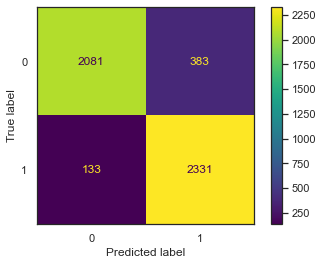

In [19]:
#Precisamos maximizar specificity já que não queremos número alto de Falsos Positivos, ou seja, casos em que o modelo diz que não é fraude, mas realmente é, pois isso faz passar despercebidas fraudes.
#Treshold que leva a melhor accuracy score e a melhor specifiticity ao mesmo tempo é i = 0.001
from sklearn.metrics import classification_report

final_LR_pred = pred_proba_df.applymap(lambda x: 1 if x > log_reg_best_thresh else 0)

print(classification_report(y_test, final_LR_pred.iloc[:,1]))

lr_cm = ConfusionMatrixDisplay(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(final_LR_pred.iloc[:,1]).reshape(np.asmatrix(final_LR_pred.iloc[:,1]).size,1))).plot()

### XGBoost Classifier

In [20]:
#Fazer GridSearchCV para LightGBM
xgbc = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder = False)

In [21]:
# lgbm_metric_combo_dict = {}
# threshold_list = [.3, .4, .5, .505, .51, .55, .7, .9]

# lgbm = lgb.LGBMClassifier()

# for i in threshold_list:
#     print ('\n******** For i = {} ******'.format(i))
    
#     lgbm.fit(X_train, y_train)
#     pred_proba_df = pd.DataFrame(lgbm.predict_proba(X_test))
    
#     y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
#     test_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
#                                            np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
#     print('-> Acurácia: {}'.format(test_accuracy))
#     test_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
#                                          np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
#     print('-> Recall: {}'.format(test_recall))
#     test_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
#                                          np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1), zero_division = 1)
#     print('-> F1-Score: {}'.format(test_f1))
    
#     log_reg_metric_combo = (test_accuracy + test_recall + test_f1)/3
#     print(f'-> Métrica Combinada: {log_reg_metric_combo}')
    
#     print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
#                            np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1)))
    
#     log_reg_metric_combo_dict[i] = log_reg_metric_combo

# lgbm_best_thresh = max(log_reg_metric_combo_dict, key=log_reg_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)
# lgbm_best_thresh

In [22]:
from sklearn.model_selection import RandomizedSearchCV

threshold_list = [.3, .4, .5, .5025, .505, .51, .55, .7]

xgbc_param_dict = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.7, 0.9],
                #    'threshold': threshold_list,
                   'max_depth': [3, 4, 5, 6, 7, 8],
                   'max_leaves': [10, 30, 50, 70, 100],
                   'n_estimators': [100, 300, 500, 700, 900]
                   }

gridsearch_xgbc = RandomizedSearchCV(xgbc,
                                     param_distributions = xgbc_param_dict,
                                     scoring = ['accuracy', 'recall'],
                                     cv = 3,
                                     refit = 'recall',
                                     verbose = 1,
                                     n_jobs = -1,
                                     random_state = 42
                                     )

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Melhores Parâmetros:  {'n_estimators': 500, 'max_leaves': 100, 'max_depth': 5, 'learning_rate': 0.1} 
 Melhor Score:  0.9963474628538779 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2464
           1       0.98      1.00      0.99      2464

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



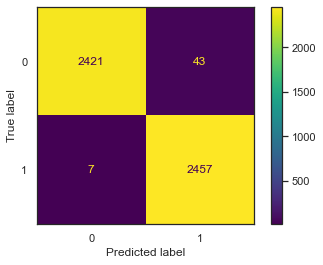

In [23]:
gridsearch_xgbc.fit(X_train, y_train)

print('\nMelhores Parâmetros: ', gridsearch_xgbc.best_params_, '\n Melhor Score: ', gridsearch_xgbc.best_score_, '\n', classification_report(y_test, gridsearch_xgbc.predict(X_test)))
xgbc_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, gridsearch_xgbc.predict(X_test))).plot()